In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

C:\Users\khann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[[19.45252948 19.06747212 19.03220428 ... 16.8295218  16.92109664
  17.69886592]
 [22.76168248 22.72157173 22.71837759 ... 19.38694888 18.01423421
  19.96907852]
 [20.51986096 20.34691304 20.34646633 ... 17.47124898 18.74849387
  21.24866695]
 ...
 [18.24264437 17.73913497 17.7383606  ... 15.63656737 15.88442692
  16.22593131]
 [17.36693293 17.33166994 17.32696831 ... 14.58225307 14.75872332
  15.37459507]
 [21.01857675 20.94862467 20.89575545 ... 19.0971723  19.21071059
  21.05679444]]


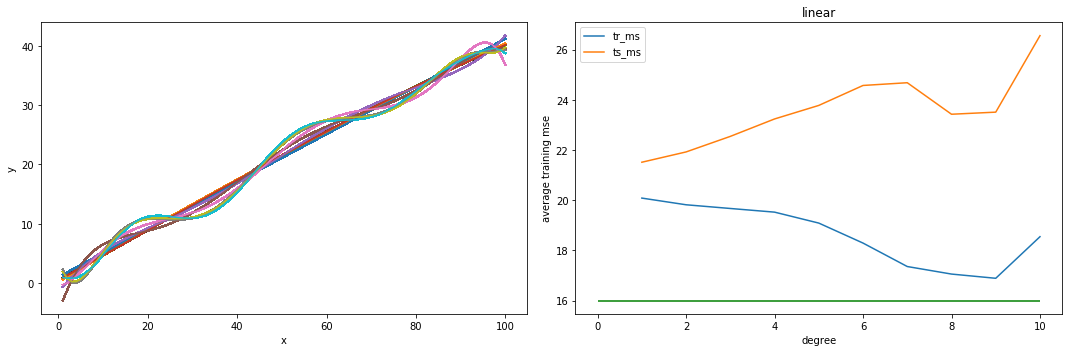

In [3]:
#The following code is generated to understand the behavior of expected 
#training and test MSE when the true relationship between the response and the predictor is linear.
np.random.seed(123)
b0= 1
b1= 0.4
sigma=4
x =np.array(np.linspace(1, 100, 100)) 
n=len(x)
y = b0+b1*x + np.random.normal( 0, sigma,n)
d={'y':y,'x':x}
data=pd.DataFrame(d)
rep=range(1,1000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# for plotting the polynomials of different degrees
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.3)
    for deg in range(1, 11):
        coefs = poly.polyfit(x, y, deg)
        ffit = poly.polyval(x, coefs)
        plt.plot(x,ffit)
        plt.xlabel('x')
        plt.ylabel('y')

deg=range(1,11)        
train_mse=np.zeros((len(rep),len(deg)))
test_mse=np.zeros((len(rep),len(deg)))
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.4)
    for d in deg:
        # Training Polynomial Regression Model
        x_tr = PolynomialFeatures(degree=d,include_bias=False).fit_transform(train_data.x.reshape(-1,1))
        x_ts = PolynomialFeatures(degree=d,include_bias=False).fit_transform(test_data.x.reshape(-1,1))
        model = LinearRegression(fit_intercept=True).fit(x_tr,train_data.y)
        # Predict Result with Polynomial Regression
        tr_pred= model.predict(x_tr)
        ts_pred=model.predict(x_ts)
        train_mse[i-1][d-1]=mean_squared_error(tr_pred,train_data.y)
        test_mse[i-1][d-1]=mean_squared_error(ts_pred,test_data.y)

avg_tr_ms=train_mse.mean(0).reshape(-1,1)
avg_ts_ms=test_mse.mean(0).reshape(-1,1)
degree=np.linspace(1,10,10)
plt.subplot(1,2,2)
plt.plot(degree,avg_tr_ms,label='tr_ms')
plt.plot(degree,avg_ts_ms,label='ts_ms')
plt.hlines(sigma**2,xmin=0,xmax=10,color='green')
plt.title('linear')
plt.legend()
plt.ylabel('average training mse')
plt.xlabel('degree')        
plt.tight_layout()  
print(train_mse)

C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


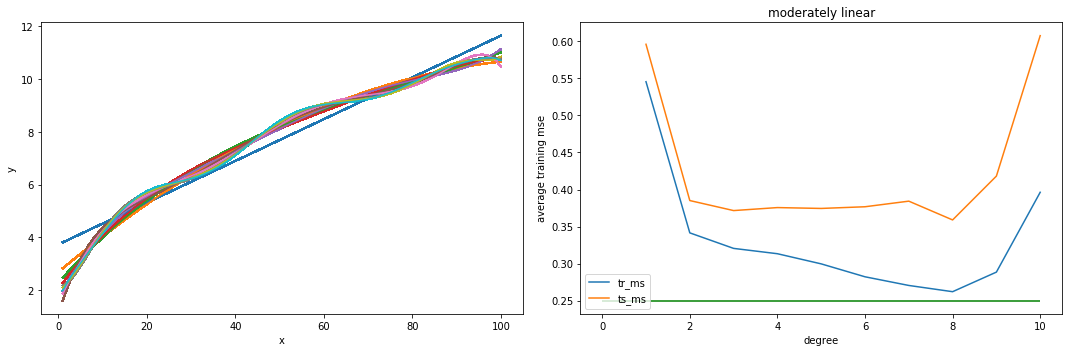

In [47]:
#The following code is generated to understand the behavior of expected 
#training and test MSE when the true relationship between the response and the predictor is moderately linear.
np.random.seed(123)
b0= 1
b1= 1
sigma=0.5
x =np.array(np.linspace(1, 100, 100)) 
n=len(x)
y = b0+b1*np.sqrt(x) + np.random.normal( 0, sigma,n)
d={'y':y,'x':x}
data=pd.DataFrame(d)
rep=range(1,1000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# for plotting the polynomials of different degrees
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.3)
    for deg in range(1, 11):
        coefs = poly.polyfit(x, y, deg)
        ffit = poly.polyval(x, coefs)
        plt.plot(x,ffit)
        plt.xlabel('x')
        plt.ylabel('y')

        
deg=range(1,11)
train_mse=np.zeros((len(rep),len(deg)))
test_mse=np.zeros((len(rep),len(deg)))
    
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.4)
    for d in deg:
        # Training Polynomial Regression Model
        x_tr = PolynomialFeatures(degree=d,include_bias=False).fit_transform(train_data.x.reshape(-1,1))
        x_ts = PolynomialFeatures(degree=d,include_bias=False).fit_transform(test_data.x.reshape(-1,1))
        model = LinearRegression(fit_intercept=True).fit(x_tr,train_data.y)
        # Predict Result with Polynomial Regression
        tr_pred= model.predict(x_tr)
        ts_pred=model.predict(x_ts)
        train_mse[i-1][d-1]=mean_squared_error(tr_pred,train_data.y)
        test_mse[i-1][d-1]=mean_squared_error(ts_pred,test_data.y)

avg_tr_ms=train_mse.mean(0).reshape(-1,1)
avg_ts_ms=test_mse.mean(0).reshape(-1,1)
degree=np.linspace(1,10,10)
plt.subplot(1,2,2)
plt.plot(degree,avg_tr_ms,label='tr_ms')
plt.plot(degree,avg_ts_ms,label='ts_ms')
plt.hlines(sigma**2,xmin=0,xmax=10,color='green')
plt.title('moderately linear')
plt.legend()
plt.ylabel('average training mse')
plt.xlabel('degree')        
plt.tight_layout()   

C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


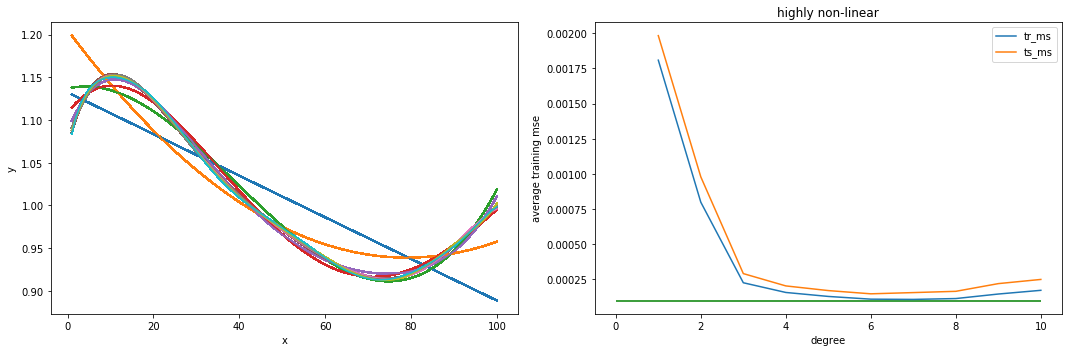

In [48]:
#The following code is generated to understand the behavior of expected 
#training and test MSE when the true relationship between the response and the predictor is highly non-linear.
np.random.seed(123)
b0= 1
b1= 1
b2=0.1
sigma=0.01
x =np.array(np.linspace(1, 100, 100)) 
n=len(x)
y = b0 - b1*np.sin(x/60) + b2*np.sqrt(x)+ np.random.normal( 0, sigma,n)
d={'y':y,'x':x}
data=pd.DataFrame(d)
rep=range(1,1000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# for plotting the polynomials of different degrees
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.3)
    for deg in range(1, 11):
        coefs = poly.polyfit(x, y, deg)
        ffit = poly.polyval(x, coefs)
        plt.plot(x,ffit)
        plt.xlabel('x')
        plt.ylabel('y')

        
deg=range(1,11)
train_mse=np.zeros((len(rep),len(deg)))
test_mse=np.zeros((len(rep),len(deg)))
    
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.4)
    for d in deg:
        # Training Polynomial Regression Model
        x_tr = PolynomialFeatures(degree=d,include_bias=False).fit_transform(train_data.x.reshape(-1,1))
        x_ts = PolynomialFeatures(degree=d,include_bias=False).fit_transform(test_data.x.reshape(-1,1))
        model = LinearRegression(fit_intercept=True).fit(x_tr,train_data.y)
        # Predict Result with Polynomial Regression
        tr_pred= model.predict(x_tr)
        ts_pred=model.predict(x_ts)
        train_mse[i-1][d-1]=mean_squared_error(tr_pred,train_data.y)
        test_mse[i-1][d-1]=mean_squared_error(ts_pred,test_data.y)

avg_tr_ms=train_mse.mean(0).reshape(-1,1)
avg_ts_ms=test_mse.mean(0).reshape(-1,1)
degree=np.linspace(1,10,10)
plt.subplot(1,2,2)
plt.plot(degree,avg_tr_ms,label='tr_ms')
plt.plot(degree,avg_ts_ms,label='ts_ms')
plt.hlines(sigma**2,xmin=0,xmax=10,color='green')
plt.title('highly non-linear')
plt.legend()
plt.ylabel('average training mse')
plt.xlabel('degree')        
plt.tight_layout()   